In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Define Michaelis-Menton Model  
## Visualize the plot where Km = 10 and vmax = 1

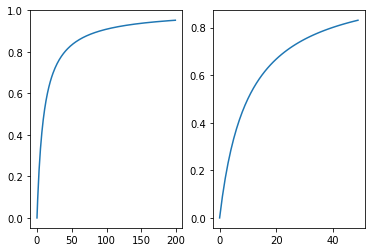

In [2]:
def MMmodel(S, Km, vmax):
    return vmax * S/(Km + S)

Km = 10
vmax = 1

n = 1000
v_std = 0.02

S1 = np.arange(0, 200, 1)
S2 = np.arange(0, 50, 1)
v1 = MMmodel(S1, Km, vmax)
v2 = MMmodel(S2, Km, vmax)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(S1, v1)
ax2.plot(S2, v2)

### According to the plot, v can be measured at where S = 1, 5, 10, 15, 20, 25, 30 ,35, 40, 45, 50, 60, 70, 80, 90, 100, 125, 150, 200  
### Create a set of simulated experimental data with Gaussian distribution with a given standard deviation  
### Each row represent a complete dataset for regression

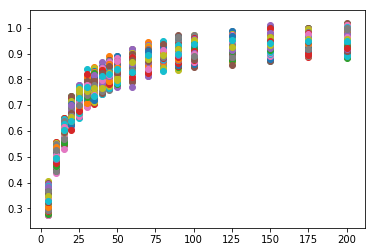

In [3]:
S_exp = np.array([5, 10, 15, 20, 25, 30 ,35, 40, 45, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200])
v_calc = MMmodel(Km = Km, vmax = vmax, S = S_exp)

def create_data(n, std):
    result = np.zeros((n, len(S_exp)))
    for index, e in enumerate(v_calc):
        temp = std * np.random.randn(n) + e
        result[:, index] = temp
    return np.array(result)

sim_data = create_data(n, v_std)

for yi in sim_data:
    plt.scatter(S_exp, yi)

## Non-linear regression

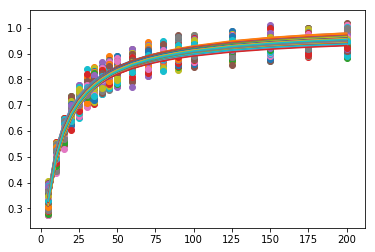

In [4]:
from scipy.optimize import curve_fit

def fit_MM(data):
    paras = np.zeros((data.shape[0], 2))
    stds = np.zeros((data.shape[0], 2))
    for index, yi in enumerate(data):
        popt, pcov = curve_fit(f = MMmodel, xdata = S_exp, ydata = yi)
        paras[index, :] = popt
        stds[index, 0] = pcov[0, 0]
        stds[index, 1] = pcov[1, 1]
    return paras, stds

paras, stds = fit_MM(sim_data)

for para, yi in zip(paras, sim_data):
    plt.plot(S_exp, MMmodel(S_exp, *para))
    plt.scatter(S_exp, yi)

Km stdev = 0.5021595339870781
vmax stdev = 0.009706511070778658


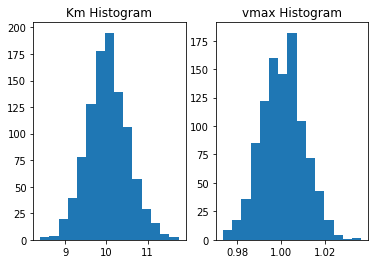

In [5]:
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.hist(paras[:,0], bins = 15)
ax1.title.set_text("Km Histogram")
ax2.hist(paras[:,1], bins = 15)
ax2.title.set_text("vmax Histogram")
print("Km stdev =", np.std(paras[:,0]))
print("vmax stdev =", np.std(paras[:,1]))

## Lineweaver–Burk plot

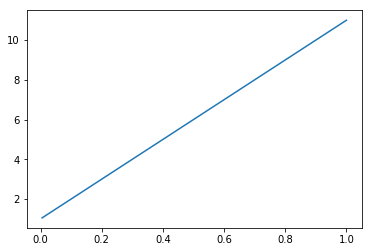

In [6]:
def LBmodel(S_reverse, Km, vmax):
    return Km/vmax * S_reverse + 1/vmax

S = np.arange(1, 200, 1)
S_reverse = 1/S
v_reverse = LBmodel(S_reverse, Km, vmax)
plt.plot(S_reverse, v_reverse)

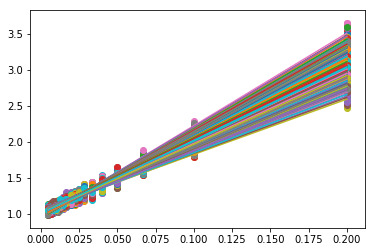

In [7]:
S_exp_reverse = 1/S_exp
sim_data_reverse = 1/sim_data

def fit_LB(data):
    paras = np.zeros((data.shape[0], 2))
    stds = np.zeros((data.shape[0], 2))
    for index, yi in enumerate(data):
        popt, pcov = curve_fit(f = LBmodel, xdata = S_exp_reverse, ydata = yi)
        paras[index, :] = popt
        stds[index, 0] = pcov[0, 0]
        stds[index, 1] = pcov[1, 1]
    return paras, stds

paras, stds = fit_LB(sim_data_reverse)

for para, yi in zip(paras, sim_data_reverse):
    plt.plot(S_exp_reverse, LBmodel(S_exp_reverse, *para))
    plt.scatter(S_exp_reverse, yi)


Km stdev = 0.9958444676358731
vmax stdev = 0.019903203678799483


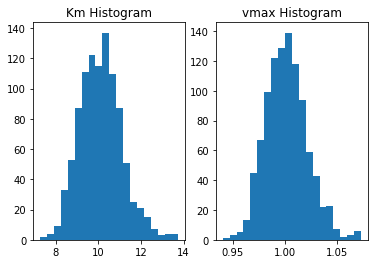

In [8]:
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.hist(paras[:,0], bins = 20)
ax1.title.set_text("Km Histogram")
ax2.hist(paras[:,1], bins = 20)
ax2.title.set_text("vmax Histogram")
print("Km stdev =", np.std(paras[:,0]))
print("vmax stdev =", np.std(paras[:,1]))

## Hanes-Woolf plot

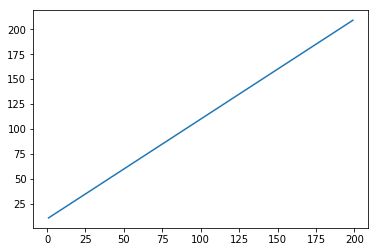

In [9]:
def HWmodel(S, Km, vmax):
    return S/vmax + Km/vmax

S = np.arange(1, 200, 1)
S_over_v = HWmodel(S, Km, vmax)
plt.plot(S, S_over_v)

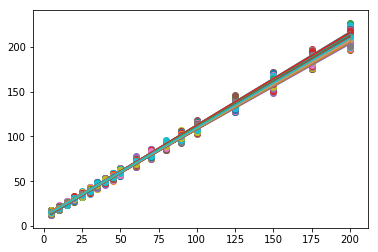

In [10]:
sim_data_S_over_v = S_exp/sim_data

def fit_HW(data):
    paras = np.zeros((data.shape[0], 2))
    stds = np.zeros((data.shape[0], 2))
    for index, yi in enumerate(data):
        popt, pcov = curve_fit(f = HWmodel, xdata = S_exp, ydata = yi)
        paras[index, :] = popt
        stds[index, 0] = pcov[0, 0]
        stds[index, 1] = pcov[1, 1]
    return paras, stds

paras, stds = fit_HW(sim_data_S_over_v)

for para, yi in zip(paras, sim_data_S_over_v):
    plt.plot(S_exp, HWmodel(S_exp, *para))
    plt.scatter(S_exp, yi)


Km stdev = 0.7863216320692604
vmax stdev = 0.013400628439887242


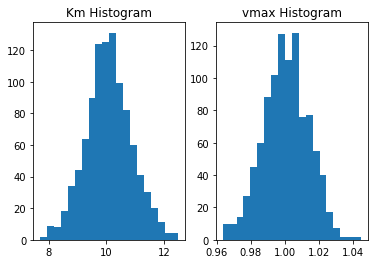

In [11]:
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.hist(paras[:,0], bins = 20)
ax1.title.set_text("Km Histogram")
ax2.hist(paras[:,1], bins = 20)
ax2.title.set_text("vmax Histogram")
print("Km stdev =", np.std(paras[:,0]))
print("vmax stdev =", np.std(paras[:,1]))

### Woolf-Augustinsson-Hofstee plot

In [12]:
def WAHmodel(v_over_S, Km, vmax):
    return - Km * v_over_S + vmax


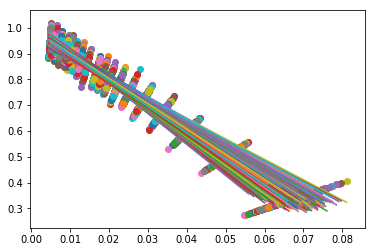

In [13]:
def fit_WAH(data):
    paras = np.zeros((data.shape[0], 2))
    stds = np.zeros((data.shape[0], 2))
    for index, yi in enumerate(data):
        popt, pcov = curve_fit(f = WAHmodel, xdata = yi/S_exp, ydata = yi)
        paras[index, :] = popt
        stds[index, 0] = pcov[0, 0]
        stds[index, 1] = pcov[1, 1]
    return paras, stds

paras, stds = fit_WAH(sim_data)

for para, yi in zip(paras, sim_data):
    plt.plot(yi/S_exp, WAHmodel(yi/S_exp, *para))
    plt.scatter(yi/S_exp, yi)


Km stdev = 0.6459823712390524
vmax stdev = 0.01185077292806508


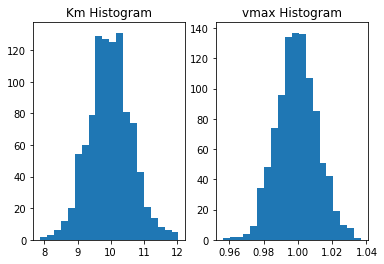

In [14]:
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.hist(paras[:,0], bins = 20)
ax1.title.set_text("Km Histogram")
ax2.hist(paras[:,1], bins = 20)
ax2.title.set_text("vmax Histogram")
print("Km stdev =", np.std(paras[:,0]))
print("vmax stdev =", np.std(paras[:,1]))

In [132]:
A = np.array([1,2,3,4,5])
B = np.array([[2,2,2,2,2],
              [3,3,3,3,3],
              [4,4,4,4,4]])
C = A+B
print(sim_data.shape)
print(S_exp.shape)
(S_exp/sim_data).shape

(1000, 19)
(19,)


(1000, 19)